# Plotting a Ramachandran map with `matplotlib`

In [1]:
%matplotlib inline
import mdtraj as md

Lets load up the trajectory that we simulated in a previous example

In [2]:
traj = md.load("ala2.h5")
atoms, bonds = traj.topology.to_dataframe()
atoms

/Users/singhs15/work/src/dev-projs/mdtraj/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


,serial,name,element,resSeq,resName,chainID,segmentID
0,None,H1,H,1,ACE,0,
1,None,CH3,C,1,ACE,0,
2,None,H2,H,1,ACE,0,
3,None,H3,H,1,ACE,0,
4,None,C,C,1,ACE,0,
5,None,O,O,1,ACE,0,
6,None,N,N,2,ALA,0,
7,None,H,H,2,ALA,0,
8,None,CA,C,2,ALA,0,
9,None,HA,H,2,ALA,0,


Because alanine dipeptide is a little nonstandard in the sense that it's basically dominated by the ACE and NME capping residues, we need to find the indicies of the atoms involved in the phi and psi angles somewhat manually. For standard cases, see `compute_phi()` and `compute_psi()` for easier solutions that don't require you to manually find the indices of each dihedral angle.

In this case, we're just specifying the four atoms that together parameterize the phi and psi dihedral angles.

In [3]:
psi_indices, phi_indices = [6, 8, 14, 16], [4, 6, 8, 14]
angles = md.compute_dihedrals(traj, [phi_indices, psi_indices])

Lets plot our dihedral angles in a scatter plot using matplotlib. What conformational states of Alanine dipeptide did we sample?

(-3.141592653589793, 3.141592653589793)

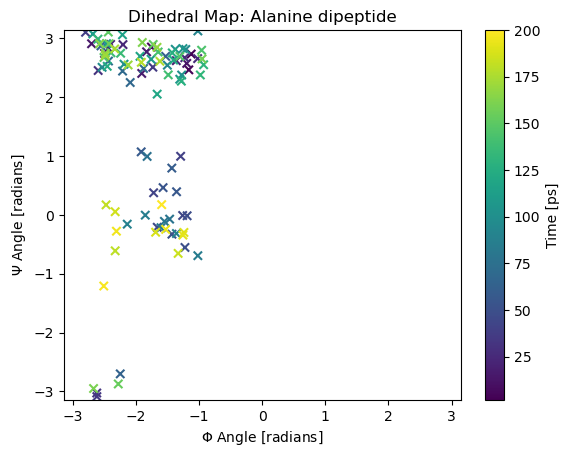

In [ ]:
from math import pi

from matplotlib.pyplot import colorbar, figure, scatter, title, xlabel, xlim, ylabel, ylim

figure()
title("Dihedral Map: Alanine dipeptide")
scatter(angles[:, 0], angles[:, 1], marker="x", c=traj.time)
cbar = colorbar()
cbar.set_label("Time [ps]")
xlabel(r"$\Phi$ Angle [radians]")
xlim(-pi, pi)
ylabel(r"$\Psi$ Angle [radians]")
ylim(-pi, pi)